In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf

# Read the data from input

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Any results you write to the current directory are saved as output.
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


## Check Data Types

In [7]:
print(train.dtypes)

Year_Factor                    int64
State_Factor                  object
building_class                object
facility_type                 object
floor_area                   float64
                              ...   
direction_peak_wind_speed    float64
max_wind_speed               float64
days_with_fog                float64
site_eui                     float64
id                             int64
Length: 64, dtype: object


### Assign numerics to catregorical labels

In [8]:
# string labels to categorical values
from sklearn.preprocessing import LabelEncoder

for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values) + list(test.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))
        test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))



## Visualize all the missing data, the white lines are missing values

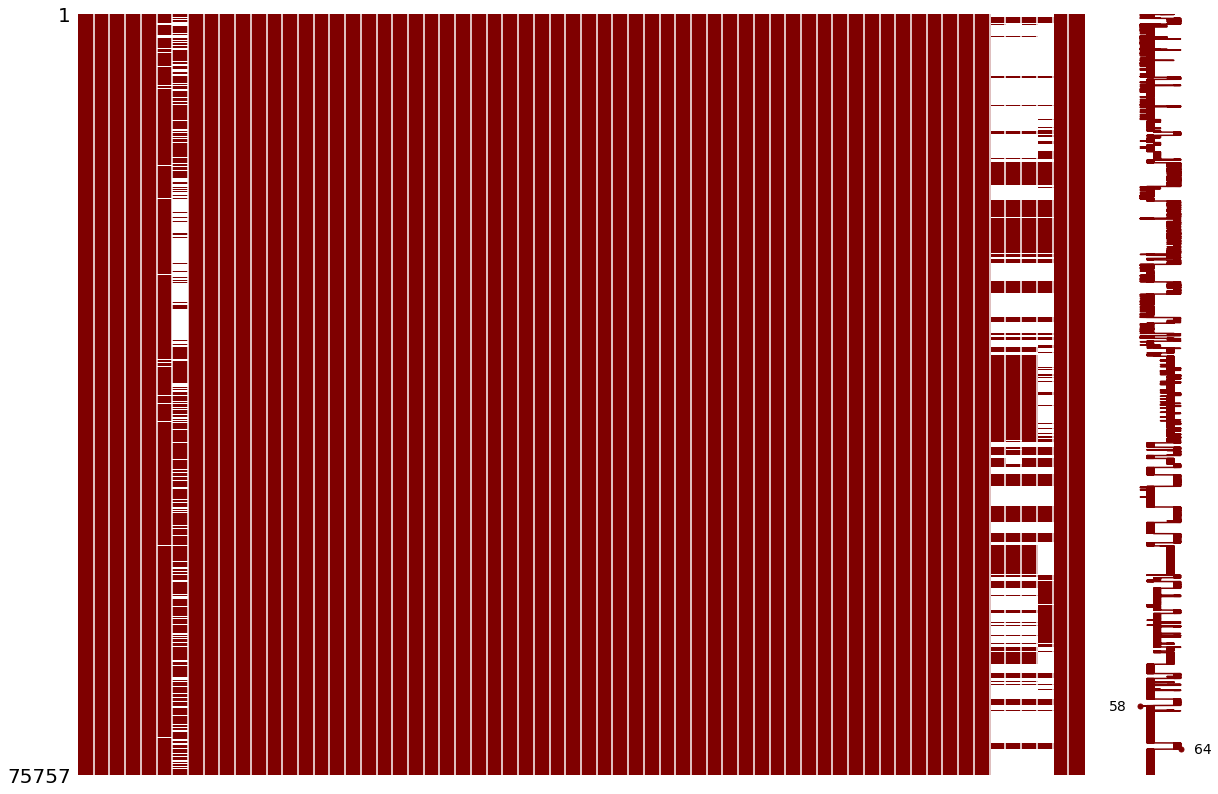

In [10]:
# search for missing data
import missingno as msno
msno.matrix(df=train, figsize=(20,14), color=(0.5,0,0))

### Which columns have missing values?

In [11]:
print('Training data+++++++++++')
for i in np.arange(train.shape[1]):
    n = train.iloc[:,i].isnull().sum()
    if n > 0:
        print(list(train.columns.values)[i] + ': ' + str(n) + ' nans')

print('Testing data+++++++++++')
for i in np.arange(test.shape[1]):
    n = test.iloc[:,i].isnull().sum()
    if n > 0:
        print(list(test.columns.values)[i] + ": " +str(n) + ' nans')

Training data+++++++++++
year_built: 1837 nans
energy_star_rating: 26709 nans
direction_max_wind_speed: 41082 nans
direction_peak_wind_speed: 41811 nans
max_wind_speed: 41082 nans
days_with_fog: 45796 nans
Testing data+++++++++++
year_built: 92 nans
energy_star_rating: 2254 nans
direction_max_wind_speed: 8575 nans
direction_peak_wind_speed: 8575 nans
max_wind_speed: 8575 nans
days_with_fog: 9117 nans


### Let's filling the missing data with the median value and drop feature columns with lots of missing data

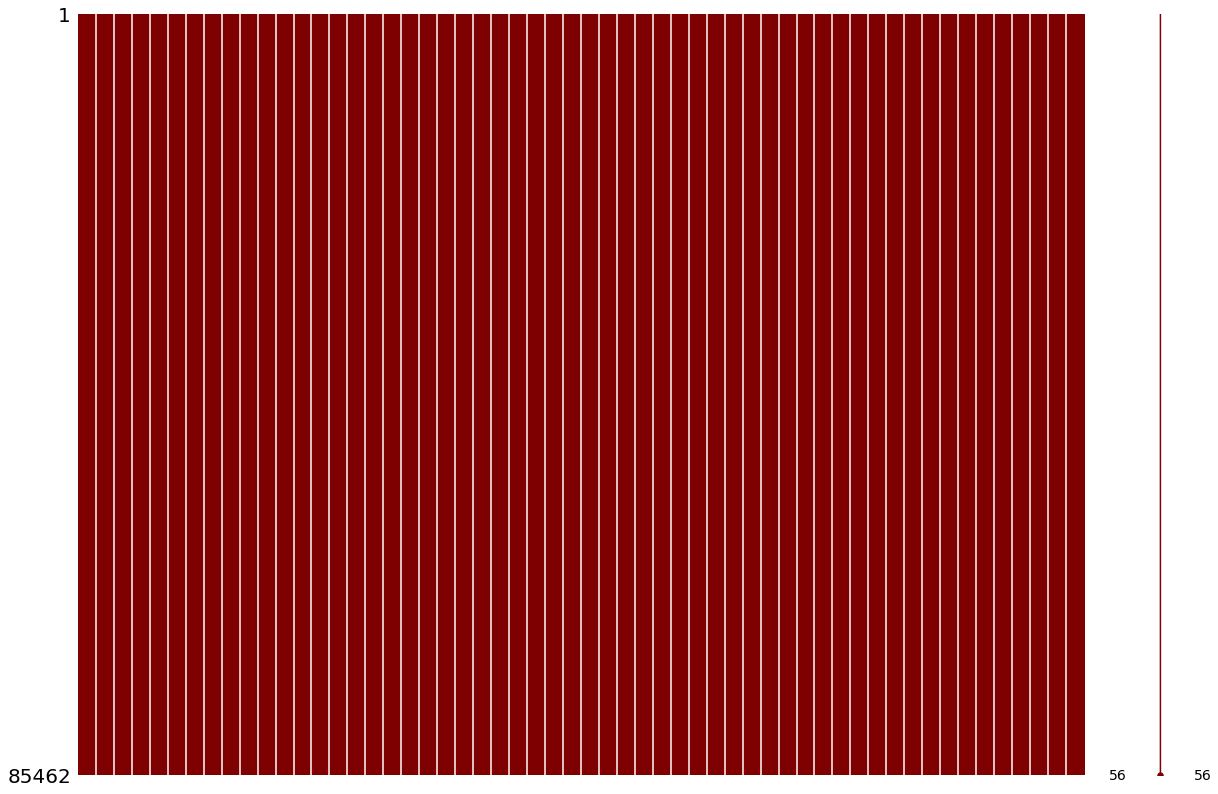

In [12]:
train_ID = train['id']
test_ID = test['id']

# split the data for training
y_train = train['site_eui']
X_train = train.drop(['id', 'facility_type', 'site_eui', 'days_above_110F'], axis=1)
X_test = test.drop(['id', 'days_above_110F', 'facility_type'], axis=1)

# Drop the columns with the largest missing data, fill spotted missing with median values
Xmat = pd.concat([X_train, X_test])
Xmat =Xmat.drop(['max_wind_speed', 'days_with_fog', 'direction_peak_wind_speed','direction_max_wind_speed'], axis =1)
Xmat = Xmat.fillna(Xmat.median())

# Visualize again
import missingno as msno
msno.matrix(df=Xmat, figsize=(20,14), color=(0.5,0,0))

In [13]:
print(Xmat.columns.values)
print(str(Xmat.shape[1]) + ' columns')

['Year_Factor' 'State_Factor' 'building_class' 'floor_area' 'year_built'
 'energy_star_rating' 'ELEVATION' 'january_min_temp' 'january_avg_temp'
 'january_max_temp' 'february_min_temp' 'february_avg_temp'
 'february_max_temp' 'march_min_temp' 'march_avg_temp' 'march_max_temp'
 'april_min_temp' 'april_avg_temp' 'april_max_temp' 'may_min_temp'
 'may_avg_temp' 'may_max_temp' 'june_min_temp' 'june_avg_temp'
 'june_max_temp' 'july_min_temp' 'july_avg_temp' 'july_max_temp'
 'august_min_temp' 'august_avg_temp' 'august_max_temp'
 'september_min_temp' 'september_avg_temp' 'september_max_temp'
 'october_min_temp' 'october_avg_temp' 'october_max_temp'
 'november_min_temp' 'november_avg_temp' 'november_max_temp'
 'december_min_temp' 'december_avg_temp' 'december_max_temp'
 'cooling_degree_days' 'heating_degree_days' 'precipitation_inches'
 'snowfall_inches' 'snowdepth_inches' 'avg_temp' 'days_below_30F'
 'days_below_20F' 'days_below_10F' 'days_below_0F' 'days_above_80F'
 'days_above_90F' 'days_abo

### Check the target distribution

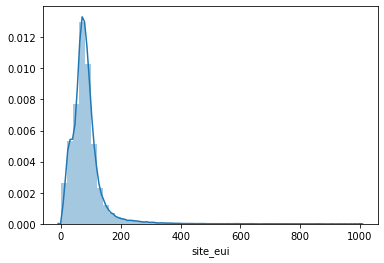

In [14]:
ax = sns.distplot(y_train)
plt.show()

### Our target label is skewed right, we need to normalize since this is regression

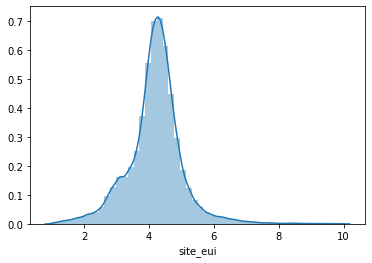

In [15]:
y_train = np.cbrt(y_train)

ax = sns.distplot(y_train)
plt.show()

### Lets see the correlations between features

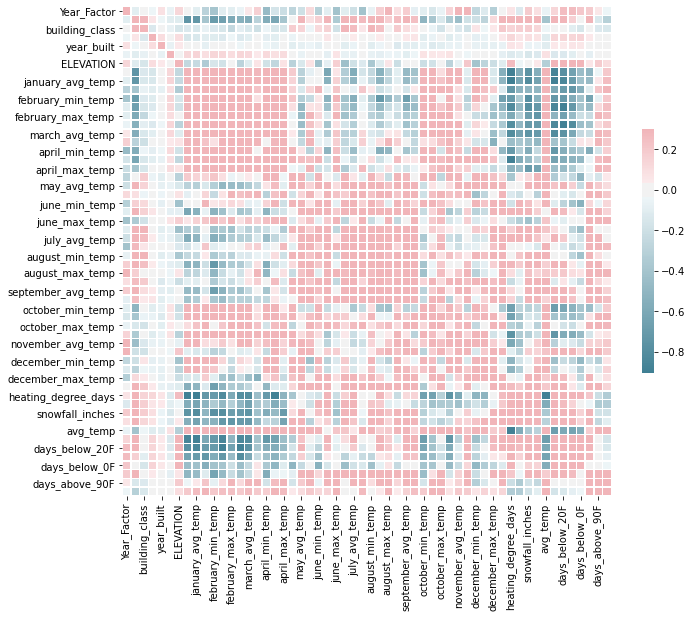

In [16]:
# Check the correlation matrix
X_train = Xmat.iloc[:train.shape[0],:]
X_test = Xmat.iloc[train.shape[0]:,:]

# Compute correlation matrix
corr = X_train.corr()

# Set up the correlation matrix
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging color map
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
               square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [17]:
#X_train = X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
#y_train = y_train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [18]:
# y_train = pd.DataFrame(y_train)

In [19]:
# y_train = y_train.fillna(y_train.mean())

### We can use a random forest regressor to tell us which features matter most

Training done using Random Forest


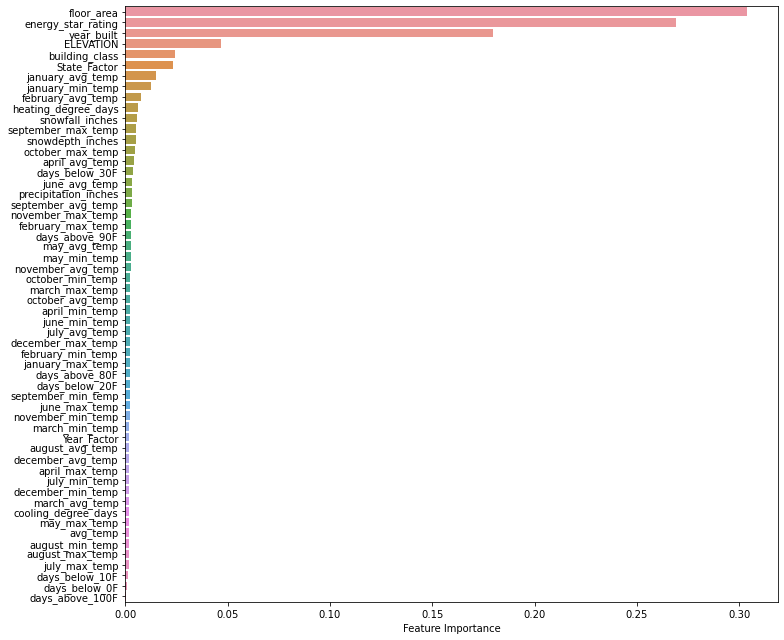

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
print("Training done using Random Forest")

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11,9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("Feature Importance")
plt.tight_layout()
plt.show()

### We'll use the top 30 features only for our learning models and create a new feature which describes the interaction of our top two features, called "Interaction"

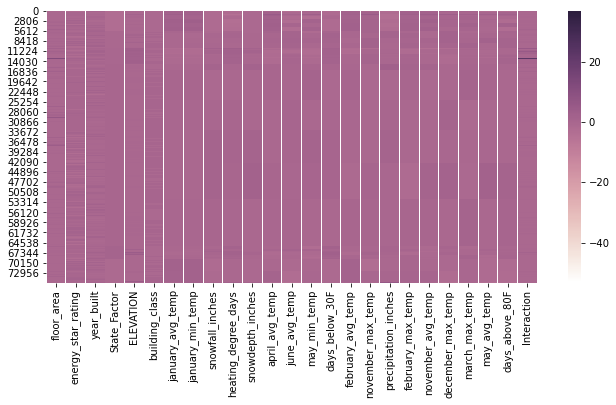

In [21]:
X_train = X_train.loc[:,['floor_area','energy_star_rating','year_built','State_Factor','ELEVATION',
                         'building_class','january_avg_temp','january_min_temp','snowfall_inches','heating_degree_days',
                         'snowdepth_inches','april_avg_temp','june_avg_temp','may_min_temp', 'days_below_30F',
                         'february_avg_temp','november_max_temp','precipitation_inches','february_max_temp',
                         'november_avg_temp','december_max_temp', 'march_max_temp','may_avg_temp','days_above_80F']]
X_test = X_test.loc[:,['floor_area','energy_star_rating','year_built','State_Factor','ELEVATION',
                         'building_class','january_avg_temp','january_min_temp','snowfall_inches','heating_degree_days',
                         'snowdepth_inches','april_avg_temp','june_avg_temp','may_min_temp', 'days_below_30F',
                         'february_avg_temp','november_max_temp','precipitation_inches','february_max_temp',
                         'november_avg_temp','december_max_temp', 'march_max_temp','may_avg_temp','days_above_80F']]


X_train["Interaction"] = X_train["floor_area"]*X_train["energy_star_rating"]
X_test["Interaction"] = X_test["floor_area"]*X_test["energy_star_rating"]

X_train["Interaction"] = X_train["floor_area"]*X_train["ELEVATION"]
X_test["Interaction"] = X_test["floor_area"]*X_test["ELEVATION"]

# We'll use z-scoring for our values to standardize the data
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()
    
# heatmap
f, ax = plt.subplots(figsize=(11, 5))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(X_train, cmap=cmap)
plt.show()

### Check features for linearity and their importance towards Sale Price

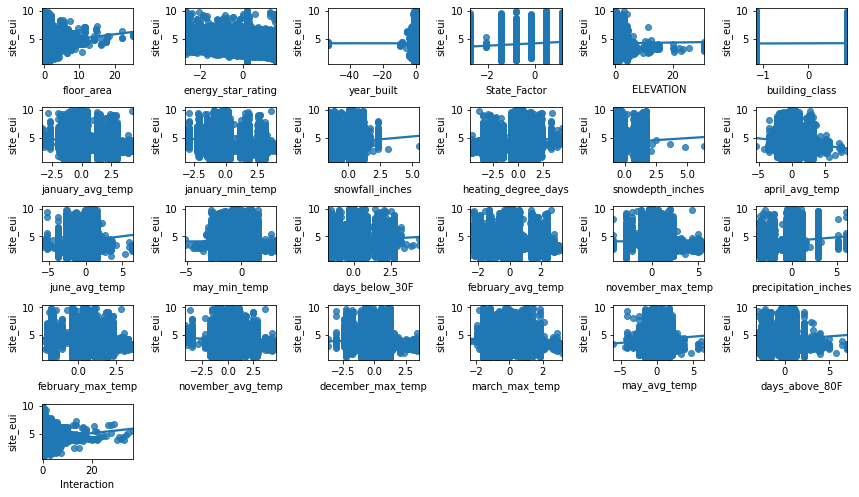

In [22]:
fig = plt.figure(figsize=(12,7))
for i in np.arange(25):
    ax = fig.add_subplot(5,6,i+1)
    sns.regplot(x=X_train.iloc[:,i], y=y_train)

plt.tight_layout()
plt.show()

### Let's delete the outliers

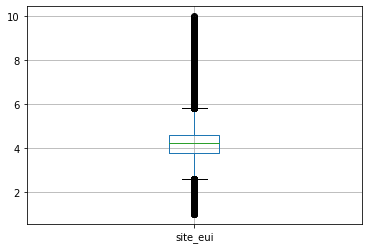

In [23]:
pd.DataFrame(y_train).boxplot()

In [24]:
Xmat = X_train
Xmat['site_eui'] = y_train
Xmat = Xmat.drop(Xmat[(Xmat['snowdepth_inches']>2.5) & (Xmat['site_eui']>9)].index)
Xmat = Xmat.drop(Xmat[(Xmat['snowfall_inches']>3) & (Xmat['site_eui']>9)].index)

# Make our training and test set ready for model analysis
y_train = Xmat['site_eui']
X_train = Xmat.drop(['site_eui'], axis=1)

### First we'll use XGBoost

In [25]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

print("Parameter Optimization")
xgb_model = xgb.XGBRegressor()
reg_xgb = GridSearchCV(xgb_model,
                       {'max_depth': [2,4,6],
                       'n_estimators': [50,100,200]}, verbose=1)
reg_xgb.fit(X_train,y_train)
print(reg_xgb.best_score_)
print(reg_xgb.best_params_)

/Users/anjalichauhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Parameter Optimization
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/anjalichauhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/anjalichauhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/anjalichauhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/anjalichauhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.

/Users/anjalichauhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/anjalichauhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/anjalichauhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/anjalichauhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from p

0.17157532051630506
{'max_depth': 2, 'n_estimators': 50}


### Next our Neural Network using Tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)
# define the grid search parameters
optimizer = ['SGD','Adam']
batch_size = [10, 30, 50]
epochs = [10, 50, 100]
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)
reg_dl = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
reg_dl.fit(X_train, y_train)

print(reg_dl.best_score_)
print(reg_dl.best_params_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


### Finally a Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

reg_svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                      param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                                 "gamma": np.logspace(-2,2,5)})# 

reg_svr.fit(X_train, y_train)

print(reg_svr.best_score_)
print(reg_svr.best_params_)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

param_test1 = {'n_estimators':range(20,81,10)}
reg_gbm = GridSearchCV(GradientBoostingRegressor((learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,subsample=0.8,random_state=10)), cv=5,
                      param_grid=param_test1, cv=5)# 

reg_svr.fit(X_train, y_train)

print(reg_svr.best_score_)
print(reg_svr.best_params_)

## Let's put all our model predictions into a DataFrame

In [ ]:
# second feature matrix
X_train2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_train),
     'GBR': reg_gbm.predict(X_train),#.ravel(),
     'SVR': reg_svr.predict(X_train),
    })
X_train2.head()

### Here we're going to use Ensemble Modeling. We're going to combine our models using a Linear Regressor to give us the weighted average of prediction accuracy. Models with higher accuracy will be given more weight. 

#### Since we're still using the data at logscale, we need to bring our predictions back to normal scale in the last line.

In [ ]:
# second-feature modeling using linear regression
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train2, y_train)

# prediction using the test set
X_test2 = pd.DataFrame( {'XGB': reg_xgb.predict(X_test),
     'GBR': reg_gbm.predict(X_test),#.ravel(),
     'SVR': reg_svr.predict(X_test),
    })

# Non-log scale
y_pred = (reg.predict(X_test2))^3

In [ ]:
# Final Predictions on home prices
submission = pd.DataFrame({
    "id": test_ID,
    "site_eui": y_pred
})
submission.to_csv('submission.csv', index=False)

## Show the first thirty sale price predictions along with the house ID
submission[:30]